In [1]:
%matplotlib qt

# Dealing with big data
This will show some demos for the discussion on how to work with large data files.

## Dask package
Dask array provides a parallel, larger-than-memory, n-dimensional array using blocked algorithms.

Simply put: distributed Numpy.

- Parallel: Uses all of the cores on your computer
- Larger-than-memory: Lets you work on datasets that are larger than your available memory by breaking up your array into many small pieces, operating on those pieces in an order that minimizes the memory footprint of your computation, and effectively streaming data from disk.
- Blocked Algorithms: Perform large computations by performing many smaller computations

This demo was adapted from [dask tutorials](https://github.com/dask/dask-tutorial/blob/master/03_array.ipynb).

In [2]:
import numpy as np
import dask.array as da
example = da.random.normal(10, 0.1, size=(10000, 10000), chunks=(500, 500))
example

dask.array<normal, shape=(10000, 10000), dtype=float64, chunksize=(500, 500), chunktype=numpy.ndarray>

### Example:

- Construct a 20000x20000 array of normally distributed random values broken up into 1000x1000 sized chunks
- Take the mean along one axis
- Take every 100th element

**NOTE: Show task manager memory profile**

In [1]:
import numpy as np

In [2]:
%%time
x = np.random.normal(10, 0.1, size=(20000, 20000))
y = x.mean(axis=0)[::100]

Wall time: 32.4 s


**Note: Restart jupyter server** to clear up memory OR **reset_selective the variable**

iPython has a set [built-in magic commands](https://ipython.readthedocs.io/en/stable/interactive/magics.html), one of which clears up a variable.
However, memory handling in Python is tricky and not that simple.

In [7]:
# The -f param will force resetting
%reset_selective -f x
%reset_selective -f y

In [ ]:
# Alternatively, use the garbage collector package
import gc

del x,y
gc.collect()

Now repeat with dask instead:

In [1]:
import dask.array as da

In [2]:
%%time
x = da.random.normal(10, 0.1, size=(20000, 20000), chunks=(1000, 1000))
y = x.mean(axis=0)[::100]
y = y.compute()

Wall time: 4.87 s


Memory difference:

<img src="memory_diff.png" width=400 />

## Sampling with pandas

Pandas `sample()` is used to generate a sample random row or column from the function caller data frame.

In [3]:
# importing pandas package
import pandas as pd

# making data frame from csv file
df = pd.read_csv("dummy_data.csv")
df
#df.head(20)

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services
...,...,...,...,...,...,...,...,...
995,Henry,NaN,11/23/2014,6:09 AM,132483,16.655,False,Distribution
996,Phillip,Male,1/31/1984,6:30 AM,42392,19.675,False,Finance
997,Russell,Male,5/20/2013,12:39 PM,96914,1.421,False,Product
998,Larry,Male,4/20/2013,4:45 PM,60500,11.985,False,Business Development


Or load partially the file, using `skiprows`:

In [4]:
n = 100
dfn = pd.read_csv("dummy_data.csv", skiprows=(lambda i: i % n !=0))
dfn

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Harold,Male,1/2/1985,9:40 PM,77544,12.447,False,Business Development
1,Jonathan,Male,7/17/2009,8:15 AM,130581,16.736,True,NaN
2,Emily,Female,1/13/1988,6:42 AM,36711,19.028,True,Human Resources
3,Kathryn,Female,6/9/1988,9:29 AM,86439,7.799,False,Finance
4,Barbara,NaN,12/10/1980,11:04 PM,90187,14.764,True,Distribution
5,NaN,Female,10/11/1990,10:57 PM,98385,10.925,NaN,Human Resources
6,Amy,NaN,5/19/1984,11:47 AM,102839,10.385,True,Distribution
7,Raymond,Male,12/12/1986,12:18 PM,47529,2.712,True,Product
8,Walter,Male,5/21/1992,12:39 AM,144701,16.323,True,Marketing
9,Albert,Male,5/15/2012,6:24 PM,129949,10.169,True,Sales


Selecting randomly n number of cases:

In [8]:
# Sample only 5 data points
df.sample(n = 5)

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
516,Gloria,Female,4/12/1992,8:26 PM,66224,15.979,True,Legal
633,Andrea,Female,11/17/2011,2:37 PM,123591,6.500,True,Engineering
684,Alice,Female,1/21/2016,5:07 PM,117787,10.485,False,NaN
712,Martin,NaN,2/6/2001,4:17 AM,123963,15.745,True,Engineering
250,Randy,NaN,2/6/1986,3:04 PM,133943,8.940,True,Sales


In [10]:
# Sample a 10% of the whole dataset
df.sample(frac=0.1)

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
842,Sandra,Female,2/7/1998,12:39 PM,132327,19.264,False,Product
545,Julie,NaN,2/4/1999,5:35 PM,93302,9.048,True,Product
996,Phillip,Male,1/31/1984,6:30 AM,42392,19.675,False,Finance
742,Martin,Male,2/25/2016,6:29 PM,61117,2.844,False,Client Services
11,Julie,Female,10/26/1997,3:19 PM,102508,12.637,True,Legal
...,...,...,...,...,...,...,...,...
573,Kimberly,Female,12/30/1981,4:51 AM,81800,5.435,True,NaN
429,Rose,Female,5/28/2015,8:40 AM,149903,5.630,False,Human Resources
896,Victor,Male,3/10/2010,5:01 PM,45267,3.942,True,Sales
125,Patricia,Female,9/1/2003,6:46 AM,49368,14.226,False,Human Resources


Estimating a parameter and getting the real parameter: comparison.

In [12]:
estimated_m = df.sample(frac=0.2).mean(axis = 0, skipna = True)
estimated_std = df.sample(frac=0.2).std(axis = 0, skipna = True)
print('Mean')
print(estimated_m)
print('--------')
print('Standard deviation')
print(estimated_std)

Mean
Salary               93143.735000
Bonus %                 10.796915
Senior Management        0.500000
dtype: float64
--------
Standard deviation
Salary               33610.026191
Bonus %                  5.154820
Senior Management        0.500305
dtype: float64


In [14]:
estimated_m = df.mean(axis = 0, skipna = True)
estimated_std = df.std(axis = 0, skipna = True)
print('Mean')
print(estimated_m)
print('--------')
print('Standard deviation')
print(estimated_std)

Mean
Salary               90662.181000
Bonus %                 10.207555
Senior Management        0.501608
dtype: float64
--------
Standard deviation
Salary               32923.693342
Bonus %                  5.528481
Senior Management        0.500266
dtype: float64


## Rebinning data

The `rebin()` method supports rebinning the data to arbitrary new shapes as long as the number of dimensions stays the same.
It can use two different algorithms:

- If the new shape dimensions are divisors of the old shape’s, the operation supports easy computation and is usually faster.
- Otherwise, the operation requires linear interpolation and is generally slower.

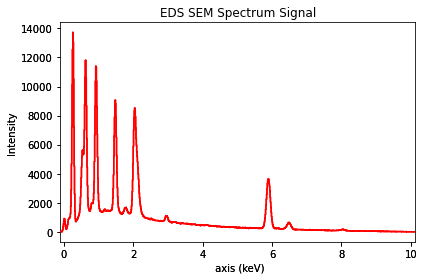

In [15]:
import hyperspy.api as hs
s = hs.datasets.example_signals.EDS_SEM_Spectrum().as_lazy()
s.plot()

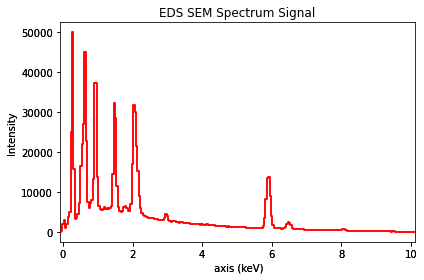

In [16]:
s_bin = s.rebin(scale=[4])
s_bin.plot()

In [17]:
# Check the number of bytes for each object
s.data.nbytes, s_bin.data.nbytes

(4096, 1024)

# Managing files in batch

This is mainly done with the `os` and `glob` packages.

In [24]:
import os, glob

data = []

base_root = r"C:\Users\jf631\Documents\GitHub\jordiferrero\nanoDTC\python_demo_notebooks\big_data_demos"
path = "folder_to_batch_process"

directory = os.path.join(base_root, path)

for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith('.txt'):
            data.append(os.path.join(root, file))

data.sort()
data

['folder_to_batch_process\\scan_01.txt',
 'folder_to_batch_process\\scan_02.txt',
 'folder_to_batch_process\\scan_03.txt',
 'folder_to_batch_process\\scan_04.txt',
 'folder_to_batch_process\\scan_05.txt']

In [28]:
for fname in data[:1]:
    print(fname)
    print(os.path.basename(fname).split('.')[0])
    print(os.path.dirname(fname))

folder_to_batch_process\scan_01.txt
scan_01
folder_to_batch_process


You can also use the powers of the `glob` package in conjuction with `os`.

In [29]:
base_root = r"C:\Users\jf631\Documents\GitHub\jordiferrero\nanoDTC\python_demo_notebooks\big_data_demos"
folder = "folder_to_batch_process"
# Note we use an asterisk
endswith_str = '*.txt' # You can also use asterisk for folders e.g. `*/*.txt`

data = [f for f in glob.glob(os.path.join(base_root, folder, endswith_str))]
data.sort()
data


['C:\\Users\\jf631\\Documents\\GitHub\\jordiferrero\\nanoDTC\\python_demo_notebooks\\big_data_demos\\folder_to_batch_process\\scan_01.txt',
 'C:\\Users\\jf631\\Documents\\GitHub\\jordiferrero\\nanoDTC\\python_demo_notebooks\\big_data_demos\\folder_to_batch_process\\scan_02.txt',
 'C:\\Users\\jf631\\Documents\\GitHub\\jordiferrero\\nanoDTC\\python_demo_notebooks\\big_data_demos\\folder_to_batch_process\\scan_03.txt',
 'C:\\Users\\jf631\\Documents\\GitHub\\jordiferrero\\nanoDTC\\python_demo_notebooks\\big_data_demos\\folder_to_batch_process\\scan_04.txt',
 'C:\\Users\\jf631\\Documents\\GitHub\\jordiferrero\\nanoDTC\\python_demo_notebooks\\big_data_demos\\folder_to_batch_process\\scan_05.txt']